In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("bigdatamart_Train.csv",na_values={"Item_Visibility":[0]})
test = pd.read_csv("bigdatamart_Test.csv",na_values={"Item_Visibility":[0]})
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [4]:
train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [5]:
train['source']='train'
test['source']='test'

In [6]:
data = pd.concat([train,test],ignore_index=True)

In [7]:
print(data.shape)
data.describe()

(14204, 13)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,13325.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.070303,141.004977,1997.830681,2181.288914
std,4.652502,0.050168,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.031396,94.012000,1987.000000,834.247400
50%,12.600000,0.057851,142.247000,1999.000000,1794.331000
75%,16.750000,0.097618,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

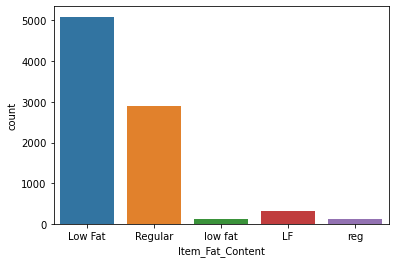

In [8]:
sns.countplot(train.Item_Fat_Content)

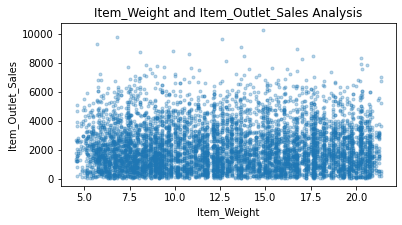

In [9]:
plt.figure(figsize=(6,3))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

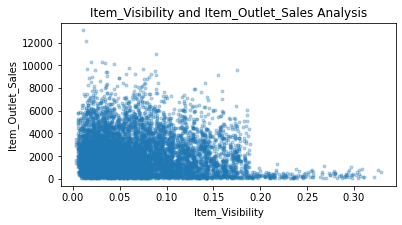

In [10]:
plt.figure(figsize=(6,3))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

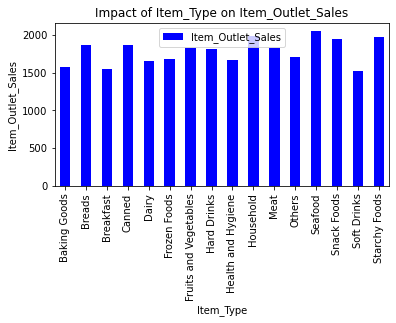

In [11]:
Item_Type_Pivot = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_Pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

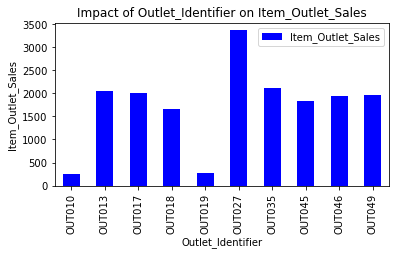

In [12]:
Outlet_Identifier_Pivot = \
train.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_Pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

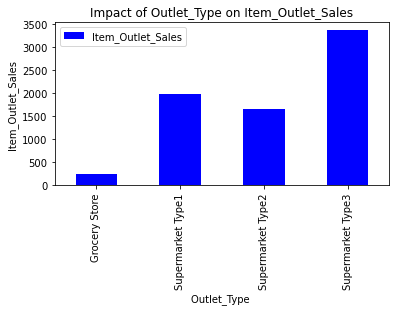

In [13]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

In [14]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [15]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [16]:
col = ["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size"]

In [17]:
print("freq distribution for each categorial column is-- \n")
for i in col:
    print("\n"+i)
    print(data[i].value_counts())

freq distribution for each categorial column is-- 


Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


In [18]:
# Replacing NaN values in Item_Weight with the mean value
data.fillna({"Item_Weight": data["Item_Weight"].mean()},inplace=True)

In [19]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [20]:
data['Outlet_Size'].fillna(method='ffill',inplace=True)

In [21]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility               879
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [22]:
# working on visibility
visibilty_avg=data.pivot_table(values="Item_Visibility",index="Item_Identifier")

In [23]:
print( visibilty_avg)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.044920
DRA24                   0.045646
DRA59                   0.148204
DRB01                   0.091127
DRB13                   0.007648
...                          ...
NCZ30                   0.030335
NCZ41                   0.064452
NCZ42                   0.012239
NCZ53                   0.026330
NCZ54                   0.090383

[1559 rows x 1 columns]


In [24]:
itm_visi = data.groupby('Item_Type')

In [25]:
data['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [26]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [27]:
data_frames=[]
for item,item_df in itm_visi:
    data_frames.append(itm_visi.get_group(item))
for i in data_frames:
    i["Item_Visibility"].fillna(value=i["Item_Visibility"].mean(),inplace=True)
    i["Item_Outlet_Sales"].fillna(value=i["Item_Outlet_Sales"].mean(),inplace=True)

  

In [28]:
print(data_frames)

[      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5               FDP36    10.395000          Regular         0.073297   
21              FDW12    12.792854          Regular         0.035400   
23              FDC37    12.792854          Low Fat         0.057557   
48              FDL12    15.850000          Regular         0.121633   
71              FDL12    15.850000          Regular         0.121532   
...               ...          ...              ...              ...   
14103           FDA23     9.800000          Low Fat         0.078981   
14108           FDU24     6.780000          Regular         0.140734   
14156           FDM12    16.700000          Regular         0.069859   
14163           FDI60    12.792854          Regular         0.038136   
14168           FDR36     6.715000          Regular         0.121775   

          Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
5      Baking Goods   51.4008            OUT018         

In [29]:
new_data=pd.concat(data_frames)

In [30]:
print(new_data)

      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
5               FDP36    10.395000          Regular         0.073297   
21              FDW12    12.792854          Regular         0.035400   
23              FDC37    12.792854          Low Fat         0.057557   
48              FDL12    15.850000          Regular         0.121633   
71              FDL12    15.850000          Regular         0.121532   
...               ...          ...              ...              ...   
13998           FDC59    12.792854          Regular         0.095648   
14016           FDF11    10.195000          Regular         0.029511   
14109           FDA22     7.435000          Low Fat         0.084584   
14174           FDD23     9.500000          Regular         0.048645   
14200           FDD47     7.600000          Regular         0.142991   

           Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
5       Baking Goods   51.4008            OUT018        

In [31]:
new_data.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Outlet_Years                 0
dtype: int64

In [32]:
new_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [33]:
new_data['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [34]:
new_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data=new_data
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type'])

In [36]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,Outlet,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
5,FDP36,10.395000,0.073297,51.4008,OUT018,2009,556.6088,train,4,3,...,0,0,0,0,0,0,0,0,0,0
21,FDW12,12.792854,0.035400,144.5444,OUT027,1985,4064.0432,train,28,5,...,0,0,0,0,0,0,0,0,0,0
23,FDC37,12.792854,0.057557,107.6938,OUT019,1985,214.3876,train,28,4,...,0,0,0,0,0,0,0,0,0,0
48,FDL12,15.850000,0.121633,60.6220,OUT046,1997,2576.6460,train,16,8,...,0,0,0,0,0,0,0,0,0,0
71,FDL12,15.850000,0.121532,59.2220,OUT013,1987,599.2200,train,26,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [38]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [39]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [40]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [50]:
x_label = ['Item_MRP', 'Item_Visibility', 'Item_Weight','Outlet_Years', 'Outlet', 'Item_Fat_Content_0','Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0','Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1','Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9','Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15']
y_label = ['Item_Outlet_Sales']

In [51]:
# from sklearn import preprocessing
# X= train[x_label].values
# y= train[y_label].values

# min_max_scaler = preprocessing.MinMaxScaler()
# X = min_max_scaler.fit_transform(X)

# x=np.insert(X,0,1,axis=1)   #for bias b

In [52]:
# def calculate_weight(x,y,epoch,print_interval):
#     print("Iteration","Error","Bias","\tWeight",sep="\t\t\t")
#     theta = np.zeros(len(x[0]))
#     m=y.size
#     for i in range(epoch):
#         h = (x@theta).reshape(-1,1)
#         error = ((y-h)**2).mean()
#         theta = theta - 0.0001*(1/m)*(x.T.dot(h-y)).reshape(-1)
#         print(str(i).center(10),error,theta[0],theta[1],sep="\t\t") if not i%print_interval else ""
#     print(str(i+1).center(10),error,theta[0],theta[1],sep="\t\t")
#     return theta

In [53]:
#  theta = calculate_weight(X,y,1000000,50000)

In [54]:
# rmse = np.sqrt(1275245.635843266)
# print(rmse)

In [55]:
# def Predict(p,theta):
#     return p@theta

# predictions = Predict(X,theta)
# print(predictions)

In [56]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [57]:
#decision tree model
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg0 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
alg0.fit(train[predictors], train[target])
train_predictions0 = alg0.predict(train[predictors])
cv_score0 = np.mean(cross_val_score(alg0,train[predictors], train[target], cv=20))

test[target] = alg0.predict(test[predictors])

IDcol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDcol})
submission.to_csv("predictions.csv", index = False)

rmse0 = np.sqrt(mean_squared_error(train[target].values, train_predictions0))

In [58]:
print("cv_score : ",cv_score0)
print("RMSE : " ,rmse0)
print("Accuracy : ",alg0.score( train[predictors],train[target]))

cv_score :  0.5874744065028807
RMSE :  1059.1553245838138
Accuracy :  0.6147364903595223


In [59]:
df = pd.read_csv("predictions.csv")
new_df =df.loc[(df['Item_Identifier'] == "FDL48")& (df['Outlet_Identifier'] == "OUT018")]
pred = new_df['Item_Outlet_Sales']
print(pred.values[0])

711.0628208695654


In [60]:
from sklearn.ensemble import RandomForestRegressor
alg1 = RandomForestRegressor(max_depth=2,random_state=0, n_estimators=100)
alg1.fit(train[predictors], train[target])
train_predictions1 = alg1.predict(train[predictors])
cv_score1 = np.mean(cross_val_score(alg1,train[predictors], train[target], cv=20))
rmse1 = np.sqrt(mean_squared_error(train[target].values, train_predictions1))

In [61]:
print("cv_score : ",cv_score1)
print("RMSE : " ,rmse1)
print("Accuracy : ",alg1.score( train[predictors],train[target]))

cv_score :  0.45114993726367586
RMSE :  1262.8411451956108
Accuracy :  0.4523084812624223


In [62]:
from sklearn.linear_model import LinearRegression

alg2 = LinearRegression()
alg2.fit(train[predictors], train[target])
train_predictions2 = alg2.predict(train[predictors])
cv_score2 = np.mean(cross_val_score(alg2,train[predictors], train[target], cv=20))
rmse2 = np.sqrt(mean_squared_error(train[target].values, train_predictions2))

In [63]:
print("cv_score : ",cv_score2)
print("RMSE : " ,rmse2)
print("Accuracy : ",alg2.score( train[predictors],train[target]))

cv_score :  0.5580525051909991
RMSE :  1128.2534605802773
Accuracy :  0.5628284237955508


In [64]:
from sklearn.svm import SVR
alg3 = SVR(kernel="rbf",C=2e4)
alg3.fit(train[predictors], train[target])
train_predictions3 = alg3.predict(train[predictors])
cv_score3 = np.mean(cross_val_score(alg3,train[predictors], train[target], cv=20))
rmse3 = np.sqrt(mean_squared_error(train[target].values, train_predictions3))

In [65]:
print("cv_score : ",cv_score3)
print("RMSE : " ,rmse3)
print("Accuracy : ",alg3.score( train[predictors],train[target]))

cv_score :  0.5282034205893045
RMSE :  1164.0407569687998
Accuracy :  0.5346551174313645


In [66]:
test[target] = alg3.predict(test[predictors])

IDcol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDcol})
submission.to_csv("SVRpredictions.csv", index = False)

In [67]:
df = pd.read_csv("SVRpredictions.csv")
new_df =df.loc[(df['Item_Identifier'] == "FDL48")& (df['Outlet_Identifier'] == "OUT018")]
pred = new_df['Item_Outlet_Sales']
print(pred.values[0])

644.6662834155668
